<a href="https://colab.research.google.com/github/hardiksraja/DataScience_Learning/blob/master/Stats_ML_Linkage/Data_Understanding__And_Prepraration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There is a 6 step process in any statistical analysis lifecycle.

1. One needs to have an understanding of data and business surrounding it (how the data is generated).
2. How the data is being collected today. Data can be collected using some online survey or field survey or can be generated naturally by business.
3. To understand whether the data is summarized data or raw data. Is it coming as it is or someone is interfering in between and summarizing the data?
4. Understand the lineange of the data. One need to understand the process that has gone through the summarized data. Basically understanding how the data is getting summarized.

5. Understand distribution and nature of data. Here the descriptive statistics comes into picture. 

6. Once you have distribution and undersatnding of the data. You then analyze the data and draw conclusion. Here inferential statistics comes into picture.

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [0]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!ls -alrt '/content/drive/My Drive/Colab Notebooks/Stats_ML_Building/Datasets/'

total 98178
-rw------- 1 root root      3452 Apr 30 17:29 loan_analysis_summary.csv
-rw------- 1 root root    396398 May  1 01:20 churn_data_st.csv
-rw------- 1 root root    132980 May  1 03:44 churn_data_actual.csv
-rw------- 1 root root 100000000 May  4 22:44 loan_analysis.csv


In [0]:
loan_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Stats_ML_Building/Datasets/loan_analysis.csv')

In [56]:
loan_df.shape[0]

141828

In [57]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

1. id: unique identifier
2. installment : monthly installment
3. grade: good loan or riskier loan 
4. annual_inc : how much is the customer earning , accordingly loan can be priced
5. loan_status : whether the loan is fully paid or loan is current or loan is in default status.
6. dti : depth to income ratio; In an credit lending process, before bank gives any loan it checks his debt to income ratio and bank do not go beyong 40%
7.fico_range_<*>:Its credit score 

from this data we can create statistical function

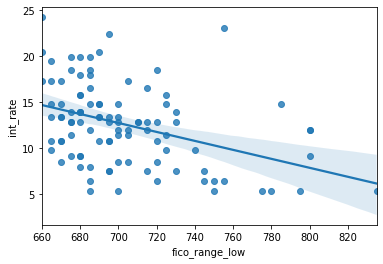

In [58]:
sns.regplot(x='fico_range_low' , y= 'int_rate' , data = loan_df[:100]) # with 100 records we are able to see some pattern
# sns.regplot(x='fico_range_low' , y= 'int_rate' , data = loan_df[:1000]) # as we add more data here more noise is getting added
# sns.regplot(x='fico_range_low' , y= 'int_rate' , data = loan_df[:10000]) # as we add more data here more noise is getting added

we cannot work with such high dataset. We can sample it but if we sample it we can have some sampling baisness.
If we want to answer business questions. We can summarize the data with various metrics.

In [59]:
# here we are checking the target variable . Wat are the different loan status available
loan_df['loan_status'].value_counts()

Fully Paid            100015
Charged Off            24851
Current                16024
Late (31-120 days)       575
In Grace Period          258
Late (16-30 days)        104
Default                    1
Name: loan_status, dtype: int64

we will create a new dataframe with records which are not current , not late and not in grace period.

In [0]:
loan_int_df=loan_df[loan_df['loan_status']!='Current']
loan_int_df=loan_int_df[loan_df['loan_status']!='Late (31-120 days)']
loan_int_df=loan_int_df[loan_df['loan_status']!='In Grace Period']
loan_int_df=loan_int_df[loan_df['loan_status']!='Late (16-30 days)']

In [61]:
loan_int_df['loan_status'].value_counts()

Fully Paid     100015
Charged Off     24851
Default             1
Name: loan_status, dtype: int64

In [62]:
loan_int_df.groupby('loan_status').agg({'last_fico_range_high':'mean'})

,last_fico_range_high
loan_status,
Charged Off,564.267917
Default,594.000000
Fully Paid,704.999670


In [0]:
#we will change few values for loan_status column
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Charged Off' , 'Default')
loan_int_df['loan_status']=loan_int_df['loan_status'].replace('Fully Paid' , 'Good')

In [64]:
loan_int_df['loan_status'].value_counts()

Good       100015
Default     24852
Name: loan_status, dtype: int64

In [0]:
loan_int_df_list = loan_int_df.columns.tolist()

In [66]:
loan_int_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124867 entries, 0 to 141827
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 144.8+ MB


In [67]:
loan_int_df['fico_range_low'].min()

660.0

In [68]:
loan_int_df['fico_range_low'].max()

845.0

In [69]:
loan_int_df['last_fico_range_low'].min()

0.0

In [70]:
print(loan_int_df.index.name), print(loan_df.index.name) 

None
None


(None, None)

In [0]:
loan_int_df['last_fico_range_low']=loan_int_df.apply(lambda x : x['fico_range_low'] if x['last_fico_range_low'] == 0.0 else x['last_fico_range_low'], axis=1)

In [72]:
loan_int_df['last_fico_range_low'].min()

500.0

In [73]:
loan_int_df['last_fico_range_low'].max()

845.0

In [0]:
#bucketing fico score into deciles. bucket it into nearest 10th digit. When we are creating the target variable, we dont want too much of data.We want fico score between 500 to 845.
#fico score : 500,510,520,530 ,....  . Created new variable. Taking lst fico_score. 845 -> 84.5 -> 85 - > 850 --> We did it to make less bucket required for summarizing purpose

import math
loan_int_df['fico_score']=loan_int_df['last_fico_range_low'].apply(lambda x: int(math.ceil(x/10))*10)

In [76]:
pd.get_option("max_rows"), pd.get_option("min_rows")

(None, 10)

In [77]:
loan_int_df.isnull().sum()

id                                                 0
member_id                                     124867
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       7981
emp_length                                      7956
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

if the account is joint then dti column will not have values but dti_joint will have the value.

In [78]:
loan_int_df[loan_int_df['dti'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score
18202,66415476,NaN,20000.0,20000.0,20000.0,36 months,16.99,712.96,D,D3,NaN,NaN,MORTGAGE,0.0,Not Verified,Dec-2015,Good,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,760xx,TX,NaN,0.0,Jul-2001,685.0,689.0,1.0,NaN,NaN,7.0,0.0,7161.0,88.4,11.0,w,0.0,0.0,23891.003232,23891.00,20000.00,3891.00,0.0,0.0,0.0,Apr-2017,13183.66,NaN,Mar-2019,649.0,645.0,0.0,NaN,1.0,Joint App,185000.0,5.31,Not Verified,0.0,0.0,8715.0,1.0,1.0,0.0,1.0,14.0,1554.0,52.0,1.0,1.0,3527.0,79.0,8100.0,1.0,0.0,1.0,3.0,1245.0,178.0,97.5,0.0,0.0,40.0,173.0,4.0,4.0,1.0,112.0,NaN,0.0,NaN,0.0,4.0,5.0,4.0,5.0,3.0,6.0,7.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,11100.0,8715.0,7200.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,650
65620,65199509,NaN,3700.0,3700.0,3700.0,36 months,12.59,123.94,C,C2,NaN,NaN,MORTGAGE,0.0,Not Verified,Nov-2015,Default,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,765xx,TX,NaN,2.0,Aug-1978,680.0,684.0,1.0,10.0,NaN,8.0,0.0,10649.0,56.9,20.0,f,0.0,0.0,366.640000,366.64,258.05,108.59,0.0,0.0,0.0,Feb-2016,123.94,NaN,Feb-2017,539.0,535.0,0.0,10.0,1.0,Joint App,40988.0,28.72,Not Verified,0.0,0.0,24521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18700.0,NaN,NaN,NaN,2.0,3065.0,358.0,10.5,0.0,0.0,110.0,447.0,5.0,5.0,1.0,87.0,10.0,5.0,10.0,0.0,1.0,5.0,1.0,5.0,8.0,6.0,11.0,5.0,8.0,0.0,0.0,1.0,1.0,90.0,0.0,0.0,0.0,38867.0,24521.0,400.0,20167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Lamda operation is faster then replace

In [0]:
#if dti column is null take dti_joint else take dti
loan_int_df['dti_final']=loan_int_df.apply(lambda x : x['dti_joint'] if pd.isnull(x['dti']) else x['dti'], axis =1)

loan_int_df['annual_inc_final']=loan_int_df.apply(lambda x : x['annual_inc_joint'] if x['annual_inc']==0.0 else x['annual_inc'] , axis=1)

In [81]:
loan_int_df.isnull().sum()

id                                                 0
member_id                                     124867
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       7981
emp_length                                      7956
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [31]:
loan_int_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_score,annual_inc_final
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,560,55000.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,793

In [0]:
fico_df=loan_int_df['fico_score'].value_counts().sort_index()

In [83]:
fico_df.head()

500     689
510    1560
520    1905
530    2158
540    2472
Name: fico_score, dtype: int64

In [84]:
# records of defaulted customers
loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()

500     599
510    1337
520    1608
530    1768
540    1954
550    1961
560    1955
570    1777
580    1612
590    1337
600    1156
610    1060
620     856
630     689
640     575
650     445
660     807
670     952
680     748
690     490
700     375
710     271
720     184
730      96
740      79
750      53
760      33
770      18
780      20
790      11
800      13
810       9
820       2
830       2
Name: fico_score, dtype: int64

In [90]:
loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean','loan_amnt':'mean','annual_inc':'median'})

,dti_final,loan_amnt,annual_inc
fico_score,,,
500,19.766444,14038.642961,60000.00
510,19.996859,13554.935897,56330.00
520,20.413071,14078.333333,60000.00
530,20.161038,14557.147822,60000.00
540,20.704013,14306.563511,60000.00
550,20.841855,14662.039216,60000.00
560,20.999829,14951.074553,63000.00
570,20.727834,15024.990208,63000.00
580,20.806092,14791.400000,64975.00


These all are business metrics to measure the loan performance

In [91]:
loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean()

,annual_inc,int_rate
fico_score,,
500,66377.772264,14.495312
510,63862.653103,14.581423
520,68007.785291,14.485596
530,71623.722294,14.739801
540,73408.481440,14.401436
550,71083.145243,14.238267
560,73220.474876,14.106151
570,72768.270905,14.018531
580,73610.114844,13.895476


In [0]:
fico_df=pd.concat([fico_df,pd.DataFrame(loan_int_df[loan_int_df['loan_status']=='Default']['fico_score'].value_counts().sort_index()), pd.DataFrame(loan_int_df[['fico_score','dti_final','loan_amnt','annual_inc']].groupby('fico_score').agg({'dti_final':'mean','loan_amnt':'mean','annual_inc':'median'})),pd.DataFrame(loan_int_df[['fico_score','annual_inc','int_rate']].groupby('fico_score').mean())], ignore_index=True, axis=1)

In [95]:
fico_df.head()

,index,0,1,2,3,4,5,6
0,500,689,599.0,19.766444,14038.642961,60000.0,66377.772264,14.495312
1,510,1560,1337.0,19.996859,13554.935897,56330.0,63862.653103,14.581423
2,520,1905,1608.0,20.413071,14078.333333,60000.0,68007.785291,14.485596
3,530,2158,1768.0,20.161038,14557.147822,60000.0,71623.722294,14.739801
4,540,2472,1954.0,20.704013,14306.563511,60000.0,73408.481440,14.401436


In [0]:
fico_df=fico_df.reset_index()

In [0]:
fico_df.columns=['fico_score','loan_total','default_total','dti','avg_loan_amt','median_annual_inc','avg_annual_inc','int_rate']

In [97]:
fico_df.head() #summarized dataset based on fico_score

,fico_score,loan_total,default_total,dti,avg_loan_amt,median_annual_inc,avg_annual_inc,int_rate
0,500,689,599.0,19.766444,14038.642961,60000.0,66377.772264,14.495312
1,510,1560,1337.0,19.996859,13554.935897,56330.0,63862.653103,14.581423
2,520,1905,1608.0,20.413071,14078.333333,60000.0,68007.785291,14.485596
3,530,2158,1768.0,20.161038,14557.147822,60000.0,71623.722294,14.739801
4,540,2472,1954.0,20.704013,14306.563511,60000.0,73408.481440,14.401436


In [0]:
fico_df['default_rate']=(fico_df.default_total/fico_df.default_total.sum())*100 #out of all default wat is the default in each bucket
fico_df['actual_default_rate']=(fico_df.default_total/fico_df.loan_total.sum())*100 # out of all the loan how much is default

In [99]:
fico_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,689,599.0,19.766444,14038.642961,60000.0,66377.772264,14.495312,2.410269,0.479710
1,510,1560,1337.0,19.996859,13554.935897,56330.0,63862.653103,14.581423,5.379849,1.070739
2,520,1905,1608.0,20.413071,14078.333333,60000.0,68007.785291,14.485596,6.470304,1.287770
3,530,2158,1768.0,20.161038,14557.147822,60000.0,71623.722294,14.739801,7.114116,1.415907
4,540,2472,1954.0,20.704013,14306.563511,60000.0,73408.481440,14.401436,7.862546,1.564865


In [100]:
fico_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,34.000000,36.000000,36.000000,36.000000,36.000000,36.000000,34.000000,34.000000
mean,675.000000,3468.527778,730.941176,18.902599,14980.718410,66386.451389,78140.689713,11.865005,2.941176,0.585376
std,105.356538,2369.294958,686.307465,1.634962,1611.898692,6516.107776,7587.492320,2.347753,2.761578,0.549631
min,500.000000,31.000000,2.000000,14.932659,12940.525803,56330.000000,63862.653103,7.327457,0.008048,0.001602
25%,587.500000,2176.750000,59.500000,17.797226,14068.410740,62000.000000,73126.419454,10.046184,0.239417,0.047651
50%,675.000000,2579.000000,587.000000,19.161461,14736.435274,65000.000000,77928.875021,12.662951,2.361983,0.470100
75%,762.500000,4778.000000,1291.750000,20.360839,15319.723274,70000.000000,81495.294220,13.908093,5.197771,1.034501
max,850.000000,8091.000000,1961.000000,21.172192,20030.645161,85000.000000,99355.500000,14.739801,7.890713,1.570471


In [101]:
fico_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.077266,-0.881226,-0.922754,0.694098,0.838912,0.910368,-0.973763,-0.881226,-0.881226
loan_total,0.077266,1.000000,-0.282477,0.109623,-0.448073,-0.125113,-0.011095,0.091873,-0.282477,-0.282477
default_total,-0.881226,-0.282477,1.000000,0.870724,-0.409150,-0.710579,-0.731509,0.857789,1.000000,1.000000
dti,-0.922754,0.109623,0.870724,1.000000,-0.737367,-0.863514,-0.878154,0.962178,0.870724,0.870724
avg_loan_amt,0.694098,-0.448073,-0.409150,-0.737367,1.000000,0.738467,0.733017,-0.808744,-0.409150,-0.409150
median_annual_inc,0.838912,-0.125113,-0.710579,-0.863514,0.738467,1.000000,0.938297,-0.874280,-0.710579,-0.710579
avg_annual_inc,0.910368,-0.011095,-0.731509,-0.878154,0.733017,0.938297,1.000000,-0.916791,-0.731509,-0.731509
int_rate,-0.973763,0.091873,0.857789,0.962178,-0.808744,-0.874280,-0.916791,1.000000,0.857789,0.857789
default_rate,-0.881226,-0.282477,1.000000,0.870724,-0.409150,-0.710579,-0.731509,0.857789,1.000000,1.000000
actual_default_rate,-0.881226,-0.282477,1.000000,0.870724,-0.409150,-0.710579,-0.731509,0.857789,1.000000,1.000000
